In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import cdist
from skimage.measure import label, regionprops, moments, moments_central, moments_normalized, moments_hu
from skimage import io, exposure
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pickle

(750, 600)


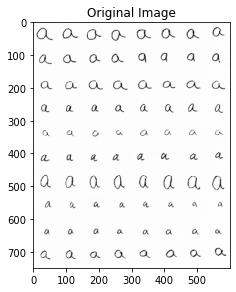

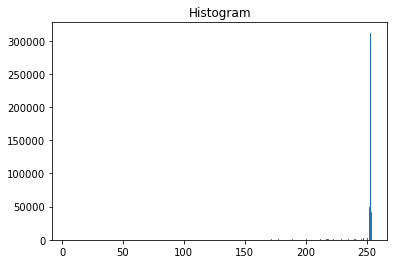

In [9]:
img = io.imread('a.bmp')
print(img.shape)


io.imshow(img)
plt.title('Original Image')
io.show()

hist = exposure.histogram(img)
plt.bar(hist[1], hist[0])
plt.title('Histogram')
plt.show()

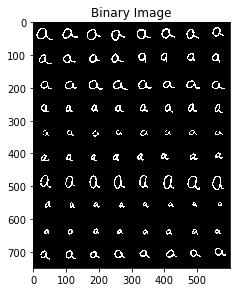

2


C:\Users\sanji\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


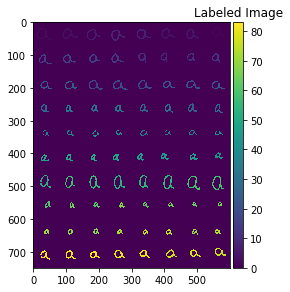

In [10]:
th = 200
img_binary = (img < th).astype(np.double)
io.imshow(img_binary)
plt.title('Binary Image')
io.show()

print(img_binary.ndim)
# img_label = label(img_binary, background=0)
img_label, num = label(img_binary, background=0, return_num=True)
io.imshow(img_label)
plt.title('Labeled Image')
io.show()

In [11]:
print(np.amax(img_label))
print(num)

83
83


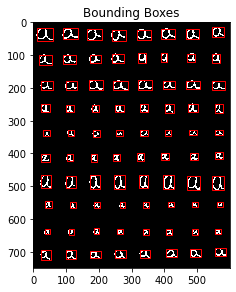

In [12]:
regions = regionprops(img_label)
io.imshow(img_binary)
ax = plt.gca()
area = np.zeros(len(regions))
i = 0
for props in regions:
    area[i] = props.area
    i+=1
    minr, minc, maxr, maxc = props.bbox
    ax.add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=1))
ax.set_title('Bounding Boxes')
io.show()

In [13]:
print(len(regions))
print(area.min())
print(area.max())

83
1.0
509.0


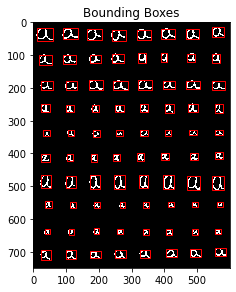

In [14]:
regions = regionprops(img_label)
io.imshow(img_binary)
ax = plt.gca()

Features=[]

for props in regions:
    minr, minc, maxr, maxc = props.bbox
    roi = img_binary[minr:maxr, minc:maxc]
    # Computing	Hu	Moments and	Removing	Small	Components
    m = moments(roi)
    cc = m[0, 1] / m[0, 0]
    cr = m[1, 0] / m[0, 0]
    mu = moments_central(roi, center=(cr, cc))
    nu = moments_normalized(mu)
    hu = moments_hu(nu)

    Features.append(hu)
    
    ax.add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=1))
ax.set_title('Bounding Boxes')
io.show()




In [15]:
print(len(Features))
print(Features[1].shape)

83
(7,)


In [16]:
D = cdist(Features, Features)

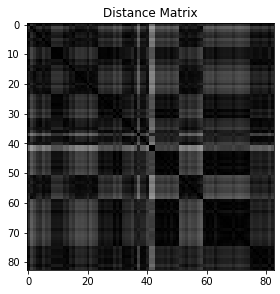

In [17]:
io.imshow(D)
plt.title('Distance Matrix')
io.show()

In [18]:
print(D[1,4])

0.190492343448558


In [30]:
D_index = np.argsort(D, axis=1) 


In [20]:
pkl_file = open('test_gt_py3.pkl', 'rb')
mydict = pickle.load(pkl_file)
pkl_file.close()
classes = mydict[b'classes']
locations = mydict[b'locations']

In [22]:
mydict.keys()

dict_keys([b'classes', b'__version__', b'locations', b'__header__', b'__globals__'])

(750, 600)


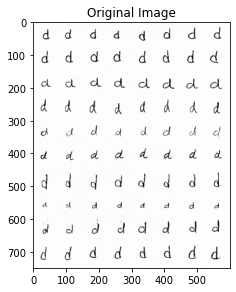

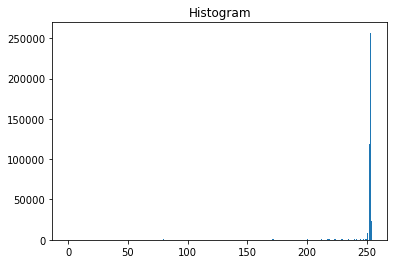

In [34]:
img2 = io.imread('d.bmp')
print(img2.shape)


io.imshow(img2)
plt.title('Original Image')
io.show()

hist = exposure.histogram(img2)
plt.bar(hist[1], hist[0])
plt.title('Histogram')
plt.show()

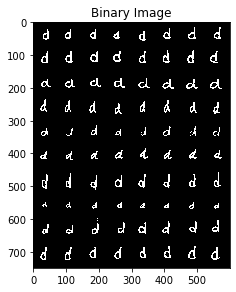

2


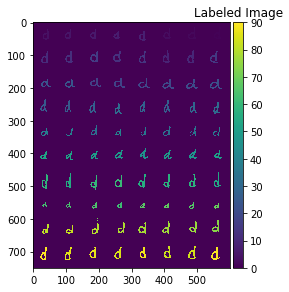

In [35]:
th = 200
img_binary2 = (img2 < th).astype(np.double)
io.imshow(img_binary2)
plt.title('Binary Image')
io.show()

print(img_binary2.ndim)
# img_label = label(img_binary, background=0)
img_label2, num2= label(img_binary2, background=0, return_num=True)
io.imshow(img_label2)
plt.title('Labeled Image')
io.show()

In [36]:
print(np.amax(img_label2))
print(num2)

90
90


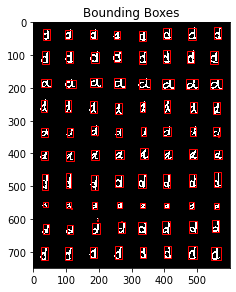

In [37]:
regions2 = regionprops(img_label2)
io.imshow(img_binary2)
ax = plt.gca()
area = np.zeros(len(regions2))
i = 0
for props in regions2:
    area[i] = props.area
    i+=1
    minr, minc, maxr, maxc = props.bbox
    ax.add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=1))
ax.set_title('Bounding Boxes')
io.show()

In [47]:
print(len(Features))
print(Features[2].shape)

83
(7,)


In [48]:
D2 = cdist(Features, Features)

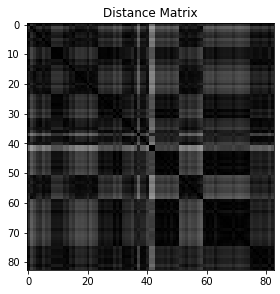

In [49]:
io.imshow(D2)
plt.title('Distance Matrix')
io.show()

(750, 600)


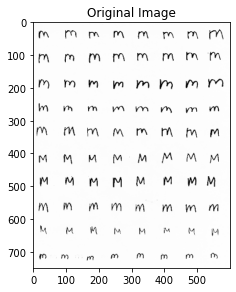

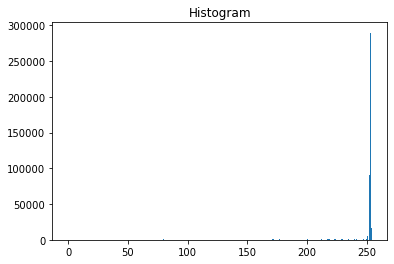

In [41]:
img3 = io.imread('m.bmp')
print(img3.shape)


io.imshow(img3)
plt.title('Original Image')
io.show()

hist = exposure.histogram(img3)
plt.bar(hist[1], hist[0])
plt.title('Histogram')
plt.show()

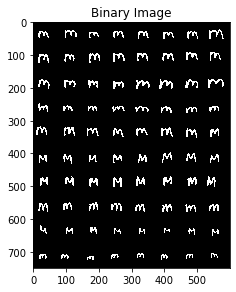

2


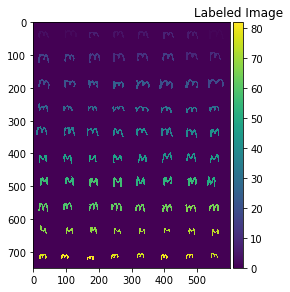

In [44]:
th = 200
img_binary3 = (img3 < th).astype(np.double)
io.imshow(img_binary3)
plt.title('Binary Image')
io.show()

print(img_binary3.ndim)
# img_label = label(img_binary, background=0)
img_label3, num3 = label(img_binary3, background=0, return_num=True)
io.imshow(img_label3)
plt.title('Labeled Image')
io.show()

In [45]:
print(np.amax(img_label3))
print(num3)

82
82


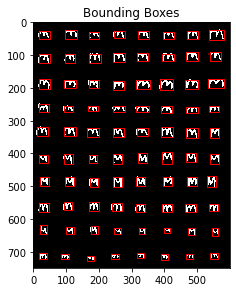

In [46]:
regions3 = regionprops(img_label3)
io.imshow(img_binary3)
ax = plt.gca()
area = np.zeros(len(regions3))
i = 0
for props in regions3:
    area[i] = props.area
    i+=1
    minr, minc, maxr, maxc = props.bbox
    ax.add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=1))
ax.set_title('Bounding Boxes')
io.show()

In [50]:
print(len(Features))
print(Features[3].shape)

83
(7,)


(750, 600)


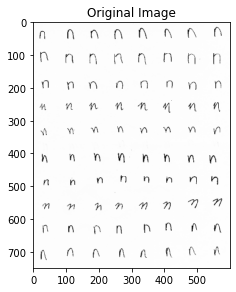

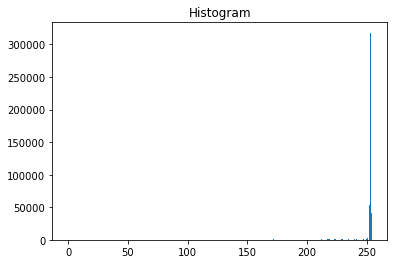

In [51]:
img4 = io.imread('n.bmp')
print(img4.shape)


io.imshow(img4)
plt.title('Original Image')
io.show()

hist = exposure.histogram(img4)
plt.bar(hist[1], hist[0])
plt.title('Histogram')
plt.show()

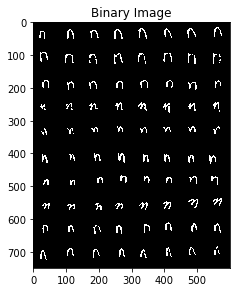

2


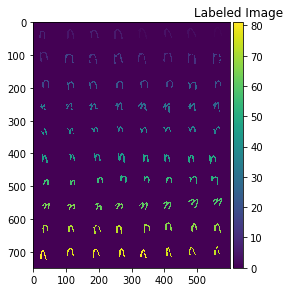

In [57]:
th = 200
img_binary4 = (img4 < th).astype(np.double)
io.imshow(img_binary4)
plt.title('Binary Image')
io.show()

print(img_binary4.ndim)
# img_label = label(img_binary, background=0)
img_label4, num4 = label(img_binary4, background=0, return_num=True)
io.imshow(img_label4)
plt.title('Labeled Image')
io.show()

In [58]:
print(np.amax(img_label4))
print(num4)

81
81


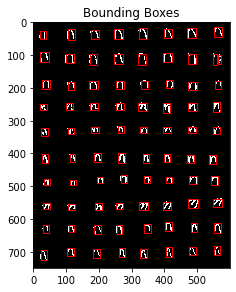

In [59]:
regions4 = regionprops(img_label4)
io.imshow(img_binary4)
ax = plt.gca()
area = np.zeros(len(regions4))
i = 0
for props in regions4:
    area[i] = props.area
    i+=1
    minr, minc, maxr, maxc = props.bbox
    ax.add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=1))
ax.set_title('Bounding Boxes')
io.show()

In [60]:
print(len(Features))
print(Features[4].shape)

83
(7,)


(750, 600)


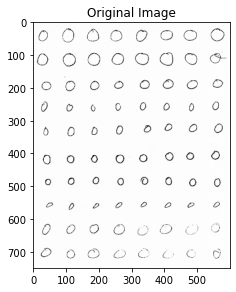

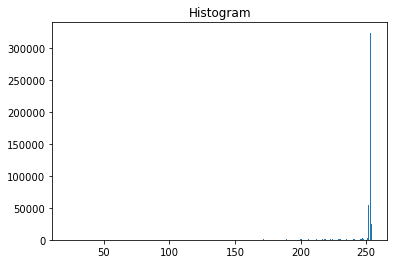

In [56]:
img5 = io.imread('o.bmp')
print(img5.shape)


io.imshow(img5)
plt.title('Original Image')
io.show()

hist = exposure.histogram(img5)
plt.bar(hist[1], hist[0])
plt.title('Histogram')
plt.show()

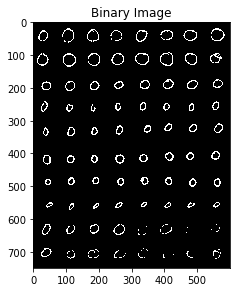

2


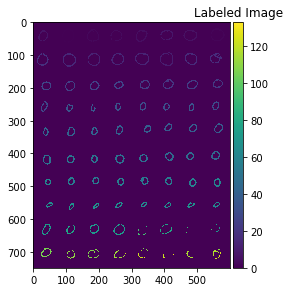

In [61]:
th = 200
img_binary5 = (img5 < th).astype(np.double)
io.imshow(img_binary5)
plt.title('Binary Image')
io.show()

print(img_binary5.ndim)
# img_label = label(img_binary, background=0)
img_label5, num5 = label(img_binary5, background=0, return_num=True)
io.imshow(img_label5)
plt.title('Labeled Image')
io.show()

In [62]:
print(np.amax(img_label5))
print(num5)

133
133


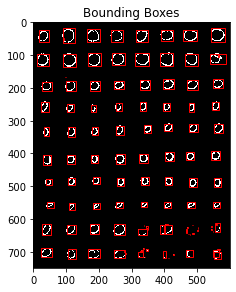

In [63]:
regions5 = regionprops(img_label5)
io.imshow(img_binary5)
ax = plt.gca()
area = np.zeros(len(regions5))
i = 0
for props in regions5:
    area[i] = props.area
    i+=1
    minr, minc, maxr, maxc = props.bbox
    ax.add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=1))
ax.set_title('Bounding Boxes')
io.show()

In [64]:
print(len(Features))
print(Features[5].shape)

83
(7,)


(750, 600)


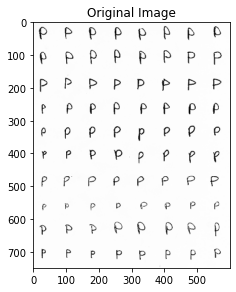

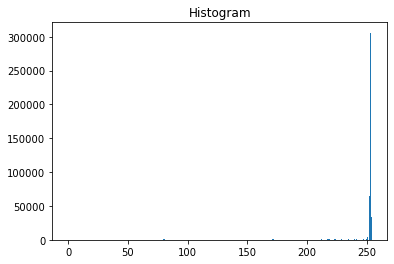

In [65]:
img6 = io.imread('p.bmp')
print(img6.shape)


io.imshow(img6)
plt.title('Original Image')
io.show()

hist = exposure.histogram(img6)
plt.bar(hist[1], hist[0])
plt.title('Histogram')
plt.show()

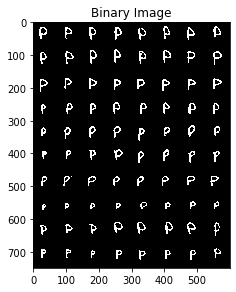

2


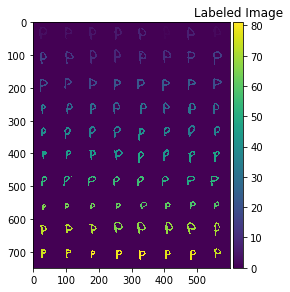

In [66]:
th = 200
img_binary6 = (img6 < th).astype(np.double)
io.imshow(img_binary6)
plt.title('Binary Image')
io.show()

print(img_binary6.ndim)
# img_label = label(img_binary, background=0)
img_label6, num6 = label(img_binary6, background=0, return_num=True)
io.imshow(img_label6)
plt.title('Labeled Image')
io.show()

In [67]:
print(np.amax(img_label6))
print(num6)

81
81


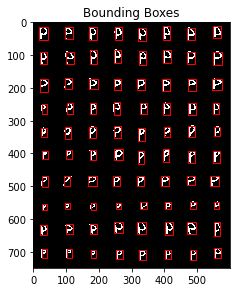

In [73]:
regions6 = regionprops(img_label6)
io.imshow(img_binary6)
ax = plt.gca()
area = np.zeros(len(regions6))
i = 0
for props in regions6:
    area[i] = props.area
    i+=1
    minr, minc, maxr, maxc = props.bbox
    ax.add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=1))
ax.set_title('Bounding Boxes')
io.show()

In [74]:
print(len(Features))
print(Features[6].shape)

83
(7,)


(750, 600)


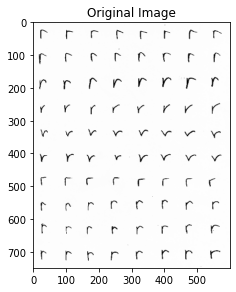

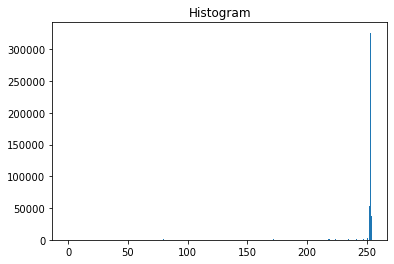

In [75]:
img7 = io.imread('r.bmp')
print(img7.shape)


io.imshow(img7)
plt.title('Original Image')
io.show()

hist = exposure.histogram(img7)
plt.bar(hist[1], hist[0])
plt.title('Histogram')
plt.show()

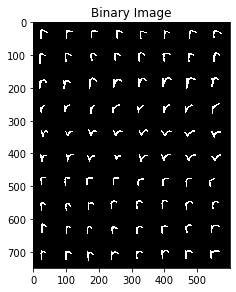

2


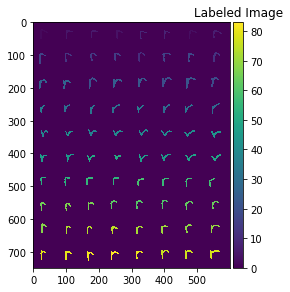

In [76]:
th = 200
img_binary7 = (img7 < th).astype(np.double)
io.imshow(img_binary7)
plt.title('Binary Image')
io.show()

print(img_binary7.ndim)
# img_label = label(img_binary, background=0)
img_label7, num7 = label(img_binary7, background=0, return_num=True)
io.imshow(img_label7)
plt.title('Labeled Image')
io.show()

In [72]:
print(np.amax(img_label7))
print(num7)

83
83


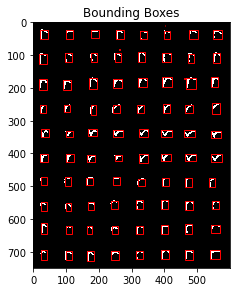

In [77]:
regions7 = regionprops(img_label7)
io.imshow(img_binary7)
ax = plt.gca()
area = np.zeros(len(regions7))
i = 0
for props in regions7:
    area[i] = props.area
    i+=1
    minr, minc, maxr, maxc = props.bbox
    ax.add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=1))
ax.set_title('Bounding Boxes')
io.show()

In [78]:
print(len(Features))
print(Features[7].shape)

83
(7,)


(750, 600)


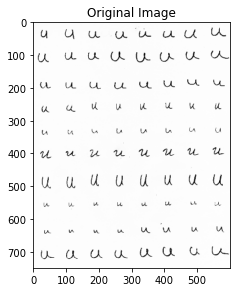

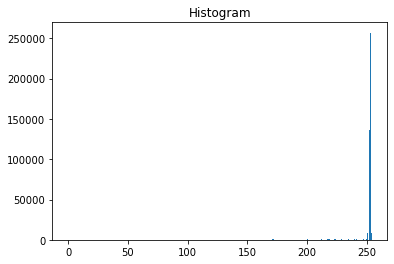

In [79]:
img8 = io.imread('u.bmp')
print(img8.shape)


io.imshow(img8)
plt.title('Original Image')
io.show()

hist = exposure.histogram(img8)
plt.bar(hist[1], hist[0])
plt.title('Histogram')
plt.show()

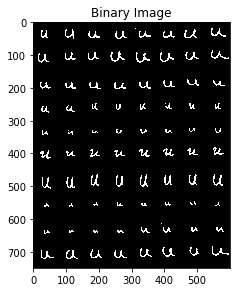

2


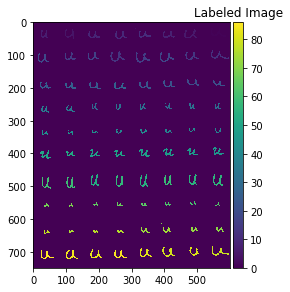

In [80]:
th = 200
img_binary8 = (img8 < th).astype(np.double)
io.imshow(img_binary8)
plt.title('Binary Image')
io.show()

print(img_binary8.ndim)
# img_label = label(img_binary, background=0)
img_label8, num8 = label(img_binary8, background=0, return_num=True)
io.imshow(img_label8)
plt.title('Labeled Image')
io.show()

In [81]:
print(np.amax(img_label8))
print(num8)

86
86


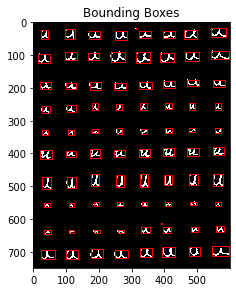

In [82]:
regions8 = regionprops(img_label8)
io.imshow(img_binary8)
ax = plt.gca()
area = np.zeros(len(regions8))
i = 0
for props in regions8:
    area[i] = props.area
    i+=1
    minr, minc, maxr, maxc = props.bbox
    ax.add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=1))
ax.set_title('Bounding Boxes')
io.show()

In [83]:
print(len(Features))
print(Features[8].shape)

83
(7,)


(750, 600)


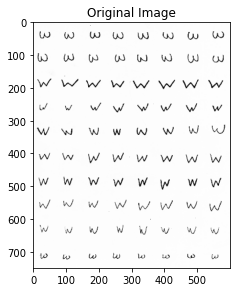

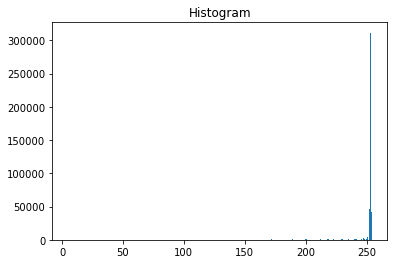

In [84]:
img9 = io.imread('w.bmp')
print(img9.shape)


io.imshow(img9)
plt.title('Original Image')
io.show()

hist = exposure.histogram(img9)
plt.bar(hist[1], hist[0])
plt.title('Histogram')
plt.show()

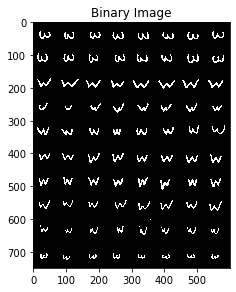

2


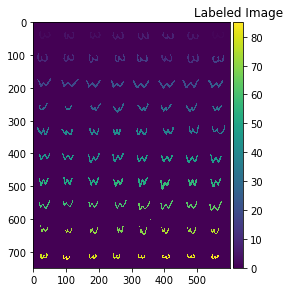

In [85]:
th = 200
img_binary9 = (img9 < th).astype(np.double)
io.imshow(img_binary9)
plt.title('Binary Image')
io.show()

print(img_binary9.ndim)
# img_label = label(img_binary, background=0)
img_label9, num9 = label(img_binary9, background=0, return_num=True)
io.imshow(img_label9)
plt.title('Labeled Image')
io.show()

In [86]:
print(np.amax(img_label9))
print(num9)

85
85


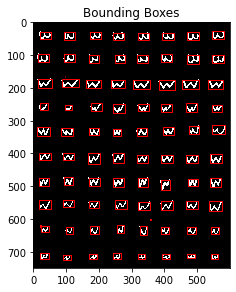

In [87]:
regions9 = regionprops(img_label9)
io.imshow(img_binary9)
ax = plt.gca()
area = np.zeros(len(regions9))
i = 0
for props in regions9:
    area[i] = props.area
    i+=1
    minr, minc, maxr, maxc = props.bbox
    ax.add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=1))
ax.set_title('Bounding Boxes')
io.show()

In [88]:
print(len(Features))
print(Features[9].shape)

83
(7,)


(750, 525)


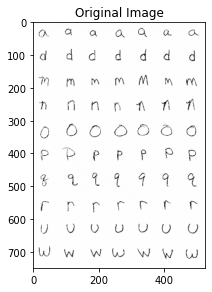

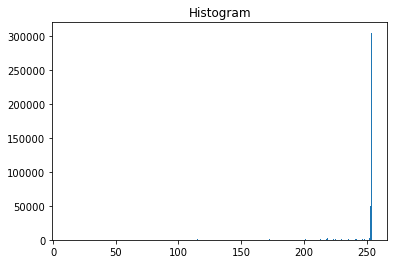

In [89]:
img10 = io.imread('test.bmp')
print(img10.shape)


io.imshow(img10)
plt.title('Original Image')
io.show()

hist = exposure.histogram(img10)
plt.bar(hist[1], hist[0])
plt.title('Histogram')
plt.show()

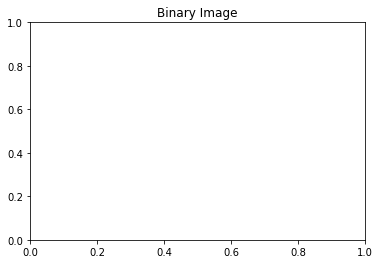

2


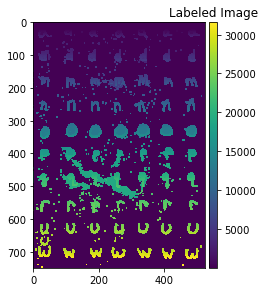

In [90]:
th = 200
img_binary10 = (img10)
plt.title('Binary Image')
io.show()

print(img_binary10.ndim)
# img_label = label(img_binary, background=0)
img_label10, num10 = label(img_binary10, background=0, return_num=True)
io.imshow(img_label10)
plt.title('Labeled Image')
io.show()

In [91]:
print(np.amax(img_label10))
print(num10)

31585
31585


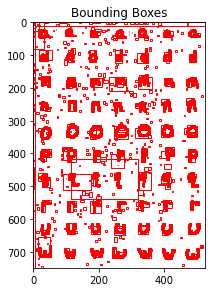

In [92]:
regions10 = regionprops(img_label10)
io.imshow(img_binary10)
ax = plt.gca()
area = np.zeros(len(regions10))
i = 0
for props in regions10:
    area[i] = props.area
    i+=1
    minr, minc, maxr, maxc = props.bbox
    ax.add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=1))
ax.set_title('Bounding Boxes')
io.show()

In [93]:
print(len(Features))
print(Features[10].shape)

83
(7,)
